## Example d'utilisation de la classe ModelLearning ou de toute classe enfant

In [1]:
import numpy as np
import math
import time
import pandas as pd
from tqdm import tqdm
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import data
import features
from model_tree_regressor import ModelTreeRegressor

In [2]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)
all_features = features.load_all_features(dico, temp, remove_useless=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:14<00:00, 16.24it/s]


All the features have been loaded in 14.79 sec
16 useless features have been removed. There are now 29 features for each setting.


** Pour choisir le type des réglages: **

'', '_non_int', '_without_lever', '_without_lever_non_int'

In [3]:
name_features = features.choose_name_features(all_features, '')
name_features

['AC_on',
 'AC_value',
 'heating_on',
 'heating_value',
 'hour',
 'nb_occupants',
 'orientation',
 'outside_temp',
 'surface_1_m2_OUTW',
 'surface_2_m2_OUTW',
 'surface_3_m2_OUTW',
 'surface_4_m2_OUTW',
 'useful_surface_m2',
 'window_percent_1_outwall',
 'window_percent_2_outwall',
 'window_percent_3_outwall',
 'window_percent_4_outwall']

In [4]:
model = ModelTreeRegressor(all_features, output)

In [5]:
# Metrics sur toutes les variables à prédire. Moyenne sur N separations train/test
results = model.cross_validate(features_names=name_features, N=5, pct_train=0.75, do_print=True)

Evolution of the 5 iterations:


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:41<00:00, 44.33s/it]


Average mse of office_temperature_degreC: 0.8986764727619374
Average mse pct of office_temperature_degreC: 0.002382683999813834
Average mse of Q_total_heating_kW: 912.27649420596
Average mse pct of Q_total_heating_kW: 340.3763460029334
Average mse of Q_total_AC_kW: 706.5351588019896
Average mse pct of Q_total_AC_kW: 519.5235970044984
Average mse of Q_total_gains_kW: 20.42889004125093
Average mse pct of Q_total_gains_kW: 0.003992923504524198
Average mse of Q_total_kW: 1478.5296660052388
Average mse pct of Q_total_kW: 0.012298022707110003


In [6]:
results

{'Q_total_AC_kW': {'mse': [502.01099594198507,
   632.24929908591992,
   924.73225039916701,
   918.0228829344054,
   555.6603656484707],
  'mse pct': [135.55872513026455,
   320.88677637951196,
   459.36843189925071,
   199.45128278416655,
   1482.3527688292982]},
 'Q_total_gains_kW': {'mse': [3.84438813518189,
   4.3850593805582321,
   12.994607800877352,
   76.157866873552123,
   4.7625280160850503],
  'mse pct': [0.0014340937704747198,
   0.0004613014742401509,
   0.0039474917511454783,
   0.012412008998371986,
   0.0017097215283886572]},
 'Q_total_heating_kW': {'mse': [1113.6666536242517,
   889.41275804944269,
   729.27170113807142,
   933.20783861987684,
   895.8235195981581],
  'mse pct': [194.75845810567176,
   356.17150323166396,
   801.09152541193987,
   280.35056580128474,
   69.509677464106801]},
 'Q_total_kW': {'mse': [1262.4021994469886,
   1136.5868744754011,
   1664.6489622994534,
   2040.8787019795172,
   1288.1315918248335],
  'mse pct': [0.011028624317881304,
   0.0

### Train model on all data to apply it on eval data

In [7]:
models = {}
# Train model on all the data
model.load_train_test_set(name_features, pct_train=1.)

for var in model.output_names:
    print("Learning on '{}'...".format(var))
    model.fit_model(var)
    models[var] = model.model

Learning on 'office_temperature_degreC'...
Learning on 'Q_total_heating_kW'...
Learning on 'Q_total_AC_kW'...
Learning on 'Q_total_gains_kW'...
Learning on 'Q_total_kW'...


In [8]:
X_val = features.load_data_features('./data/test_input.csv', name_features, remove_useless=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:01<00:00, 19.10it/s]


All the features have been loaded in 1.89 sec
16 useless features have been removed. There are now 29 features for each setting.


In [9]:
model.save_output(models, './data/test.csv', X_val)

100%|███████████████████████████████████████████████████████████████████████| 314496/314496 [00:14<00:00, 21082.35it/s]


File saved at './data/test.csv'


# Affichage de courbes prediction Vs ground truth

In [10]:
model = ModelTreeRegressor(all_features, output)
model.load_train_test_set(name_features)

**1. Q_total_AC_kW **

In [11]:
model.train_model_to_plot('Q_total_AC_kW')

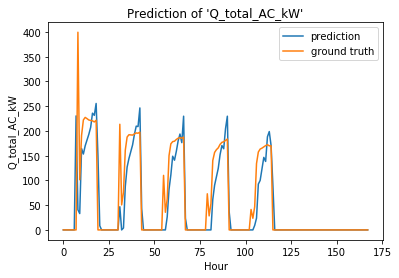

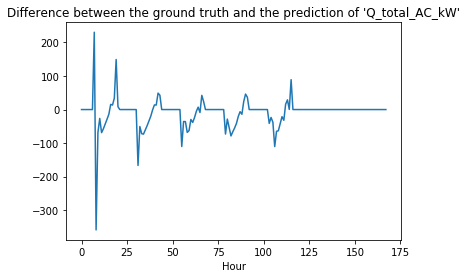

In [12]:
num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

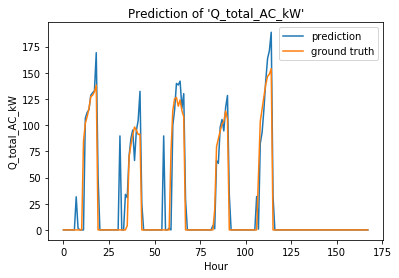

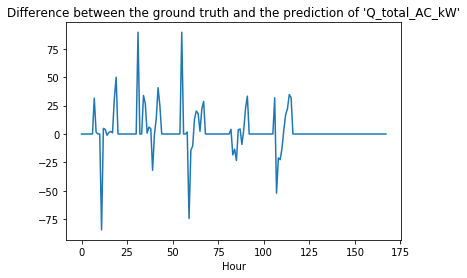

In [13]:
num_sem2 = 20
model.plot_period(7*24*num_sem2, 7*24*(num_sem2 + 1))

**2. Q_total_heating_kW **

In [14]:
model.train_model_to_plot('Q_total_AC_kW')

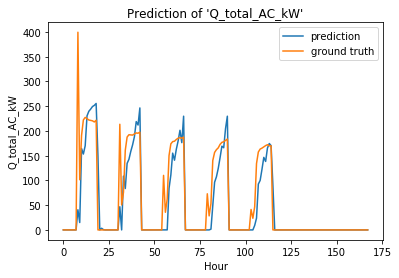

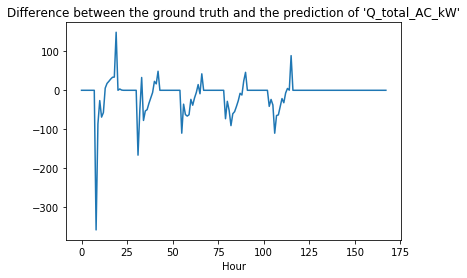

In [15]:
num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

**3. Q_total_gains_kW**

In [16]:
output['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

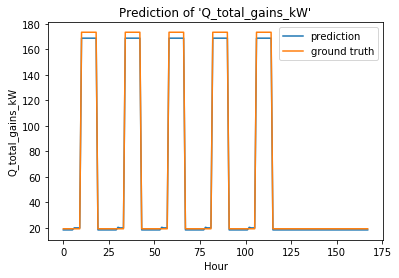

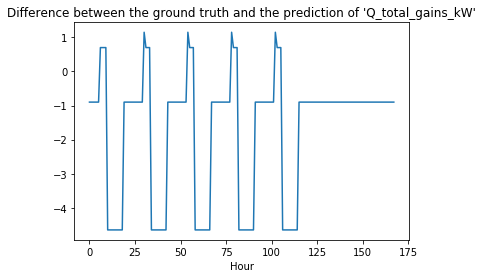

In [17]:
model.train_model_to_plot('Q_total_gains_kW')

num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

**4. Q_total_kW**

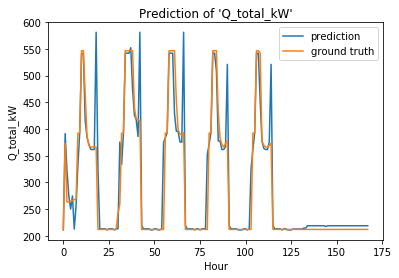

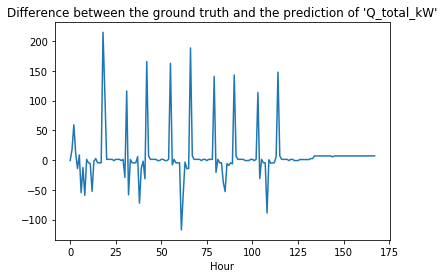

In [18]:
model.train_model_to_plot('Q_total_kW')

num_sem = 155
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

**5. office_temperature_degreC**

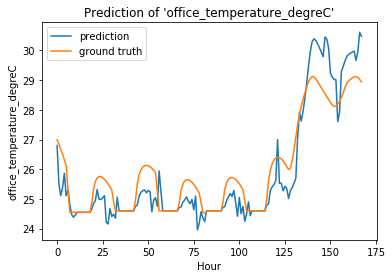

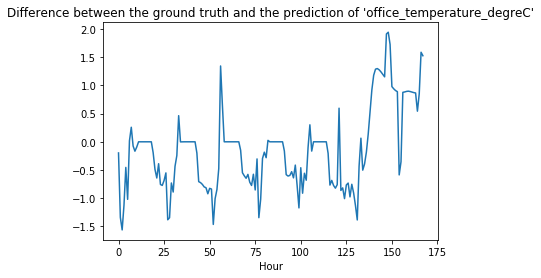

In [19]:
model.train_model_to_plot('office_temperature_degreC')

num_sem = 500
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

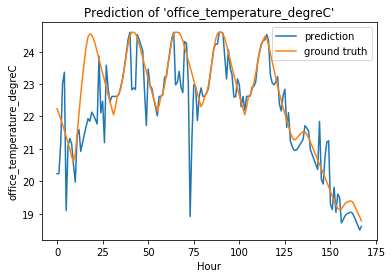

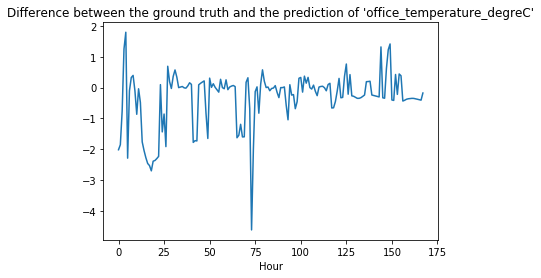

In [20]:
num_sem = 250
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

In [28]:
dico.keys()

dict_keys(['building_10_0', 'building_10_1', 'building_10_10', 'building_10_11', 'building_10_12', 'building_10_13', 'building_10_14', 'building_10_15', 'building_10_16', 'building_10_17', 'building_10_18', 'building_10_19', 'building_10_2', 'building_10_3', 'building_10_4', 'building_10_5', 'building_10_6', 'building_10_7', 'building_10_8', 'building_10_9', 'building_11_0', 'building_11_1', 'building_11_10', 'building_11_11', 'building_11_12', 'building_11_13', 'building_11_14', 'building_11_15', 'building_11_16', 'building_11_17', 'building_11_18', 'building_11_19', 'building_11_2', 'building_11_3', 'building_11_4', 'building_11_5', 'building_11_6', 'building_11_7', 'building_11_8', 'building_11_9', 'building_12_0', 'building_12_1', 'building_12_10', 'building_12_11', 'building_12_12', 'building_12_13', 'building_12_14', 'building_12_15', 'building_12_16', 'building_12_17', 'building_12_18', 'building_12_19', 'building_12_2', 'building_12_3', 'building_12_4', 'building_12_5', 'buildi